In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns; sns.set_theme()
import string

def global_mean(ds):
    lat = ds['lat']
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)
                             
def zonal_mean(ds):
    lat = ds['lat']
    plev = ds['plev']
    other_dims = set(ds.dims) - {'lat'}
    other_dims = other_dims - {'plev'}
    return ds.mean(other_dims)


In [37]:
models = []
labels = []
ds_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/o3/gn/files/d20191031/*')
# solar dimming experiments, surface temperature
models.append(ds_solar)
labels.append('G6solar')

ds_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/o3/gn/files/d20191113/*')
# sulfur injection experiment, surface temperature
models.append(ds_sulfur)
labels.append('G6sulfur')

ds_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/o3/gn/files/d20190507/*')
# ssp 5, rcp8.5, surface temperature
models.append(ds_585)
labels.append('ssp585')

ds_G1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Amon/o3/gn/files/d20190916/*')
# weak solar dimming perhaps?, surface temperature
models.append(ds_G1)
labels.append('G1')

ds_piC = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL'+\
                           '/piControl/r1i1p1f2/Amon/o3/gn/files/d20200828/*')#.isel(time=slice(0,1200))
models.append(ds_piC)
labels.append('piControl')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self

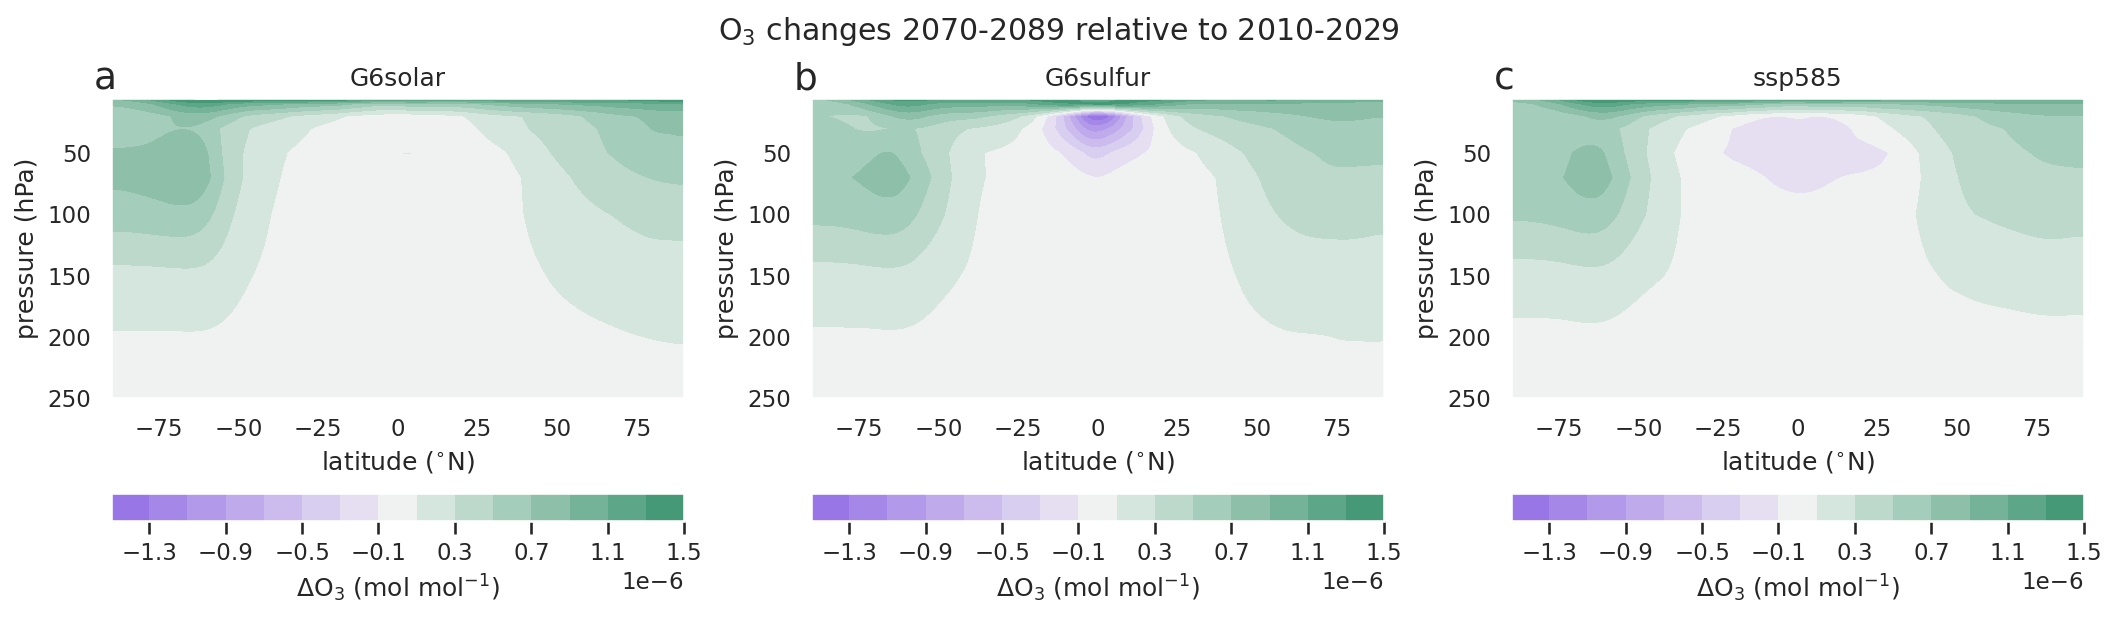

In [18]:
cmap = sns.diverging_palette(275,150,s=80, l=55, n=16, as_cmap=True)
fig = plt.figure(constrained_layout=True, figsize = (14,4), dpi= 150)
ax_dict = fig.subplot_mosaic(
    """
    AABBCC
    """
)

#fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 5), dpi = 150)

for i, ax in enumerate(fig.axes):
    
    ax.text(-0.03, 1.03, string.ascii_lowercase[i], transform=ax.transAxes, 
            size=18,)
    m = models[i]
    m = m.where(m.plev < 27500,drop=True)
    l = labels[i]
    lat = m.lat.values
    plev = m.plev.values
    
    m2080 = m.sel(time=slice("2070","2089"))
    m2080 = m2080.mean(dim="time").mean(dim="lon")
    m2010 = m.sel(time=slice("2010","2029"))
    m2010 = m2010.mean(dim="time").mean(dim="lon")
    
    m = (m2080-m2010).o3.transpose("plev","lat")
    cs = ax.contourf(lat, plev/100, m, cmap = cmap, levels=list(np.linspace(-1.5e-6,1.5e-6,16)))
    ax.set_title(l)
    ax.set_xlabel('latitude ($^{\circ}$N)')
    ax.set_ylabel('pressure (hPa)')
    ax.set_ylim([250,5])
    ax.set_xlim([-90,90])
    cb = fig.colorbar(cs, ax = ax, orientation="horizontal")
    cb.set_label(label = '$\Delta$O$_3$ (mol mol$^{-1}$)')




fig.suptitle('O$_3$ changes 2070-2089 relative to 2010-2029')
plt.show()

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self

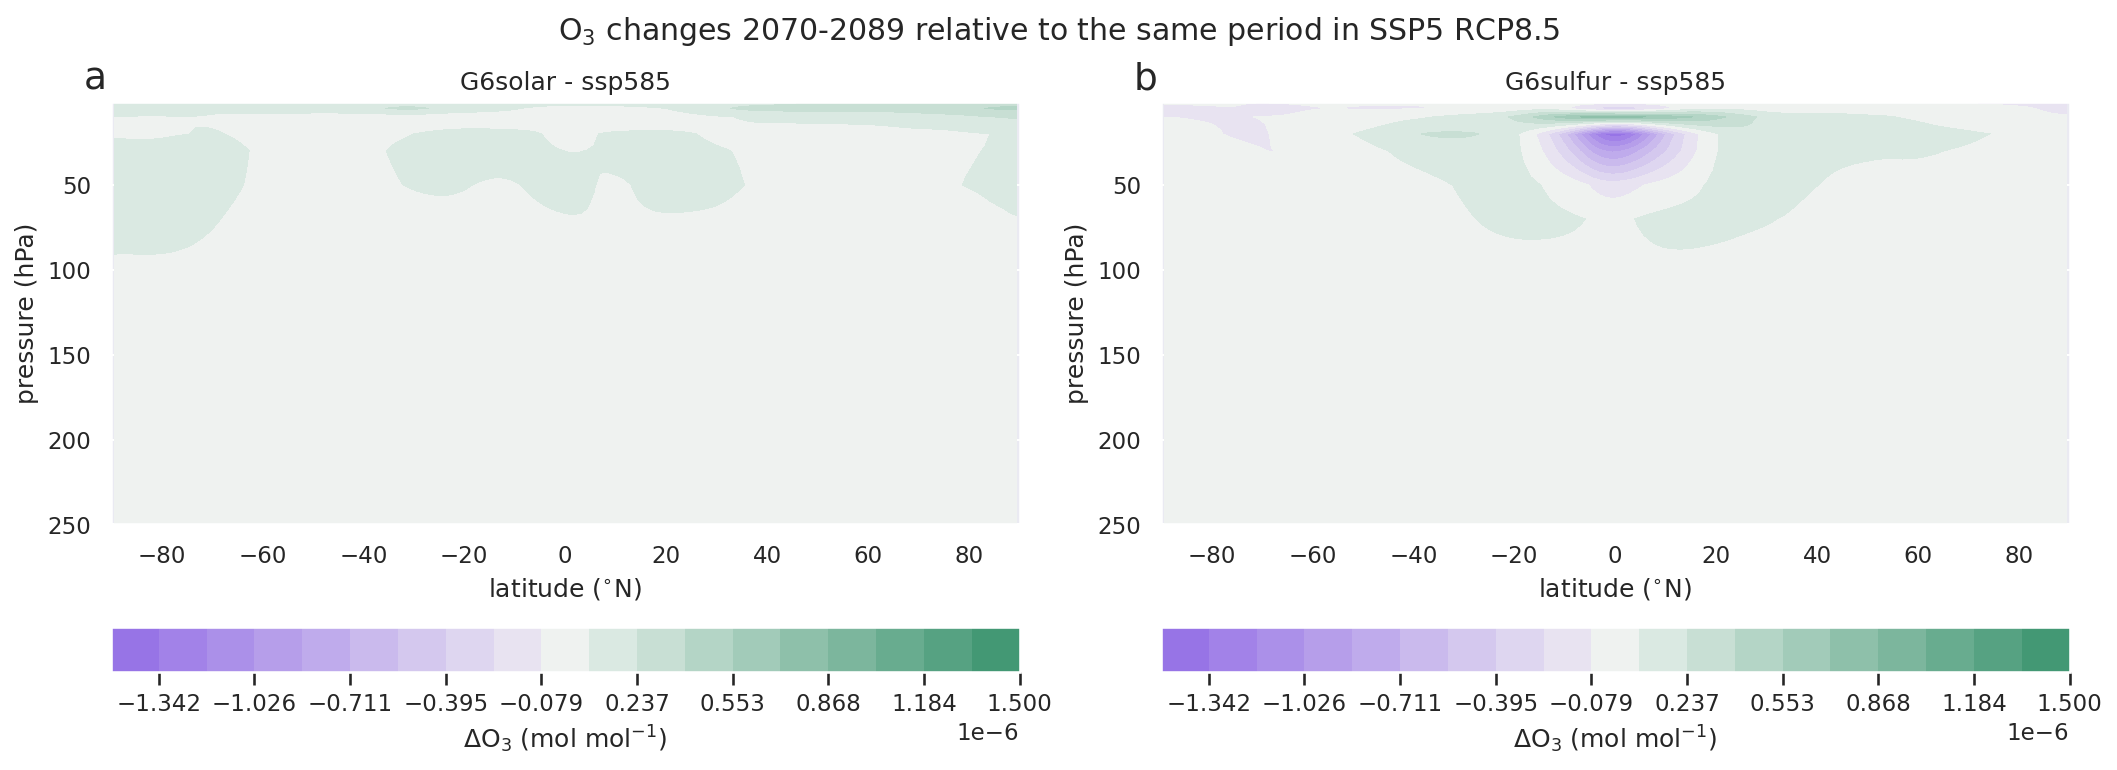

In [38]:
cmap = sns.diverging_palette(275,150,s=80, l=55, n=20, as_cmap=True)
fig = plt.figure(constrained_layout=True, figsize = (14,5), dpi= 150)
ax_dict = fig.subplot_mosaic(
    """
    AABB
    """
)


ds85 = ds_585.sel(time=slice("2070","2089"))
ds85 = ds85.where(ds85.plev < 27500, drop = True)
ds85 = ds85.mean(dim="time").mean(dim="lon")

for i, ax in enumerate(fig.axes):
    
    ax.text(-0.03, 1.03, string.ascii_lowercase[i], transform=ax.transAxes, 
            size=18,)
    
    m = models[i]
    m = m.where(m.plev < 27500,drop=True)
    l = labels[i]
    lat = m.lat.values
    
    plev = m.plev.values
    
    
    m2080 = m.sel(time=slice("2070","2089"))
    m2080 = m2080.mean(dim="time").mean(dim="lon")
    
    m = (m2080-ds85).o3.transpose("plev","lat")
    cs = ax.contourf(lat, plev/100, m, cmap = cmap, levels=list(np.linspace(-1.5e-6,1.5e-6,20)))
    ax.set_title(l+" - ssp585")
    ax.set_xlabel('latitude ($^{\circ}$N)')
    ax.set_ylabel('pressure (hPa)')
    ax.set_ylim([250,1])
    ax.set_xlim([-90,90])
    cb = fig.colorbar(cs, ax = ax, orientation="horizontal",)
                     #ticks = list(np.linspace(-1e6,1e6,10)))
    cb.set_label(label = '$\Delta$O$_3$ (mol mol$^{-1}$)')




fig.suptitle('O$_3$ changes 2070-2089 relative to the same period in SSP5 RCP8.5')
plt.show()